Available crops:


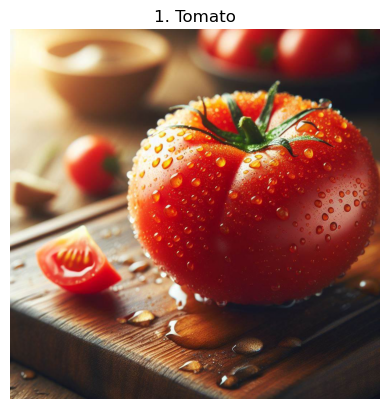

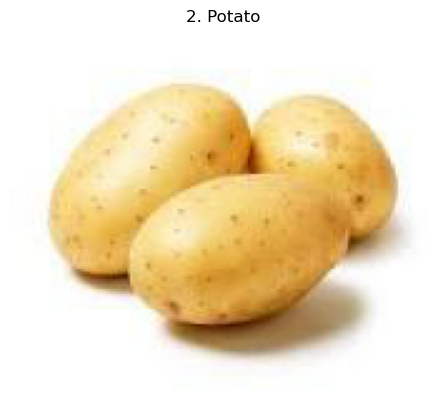

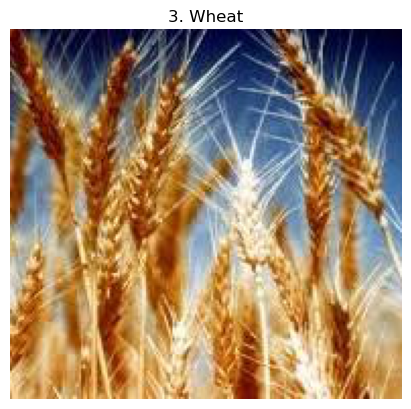

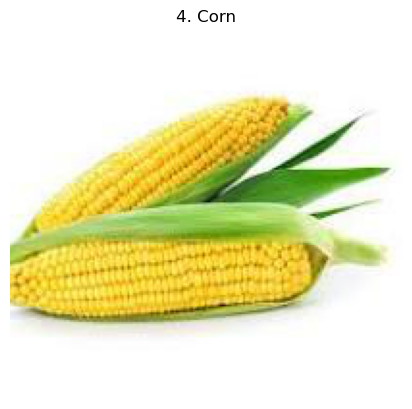

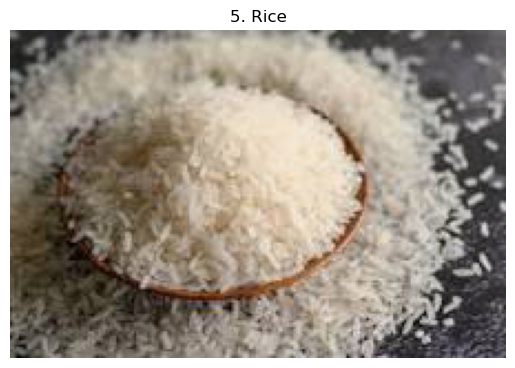

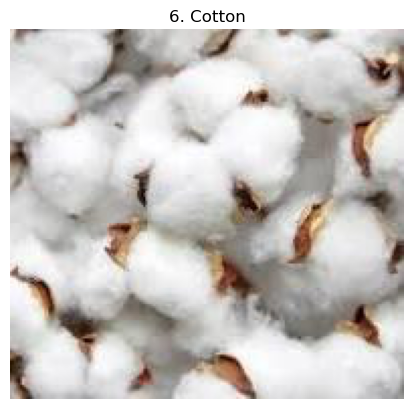

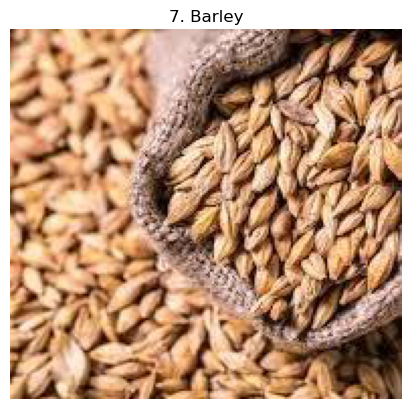

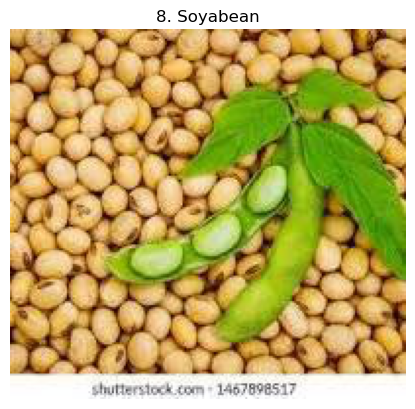

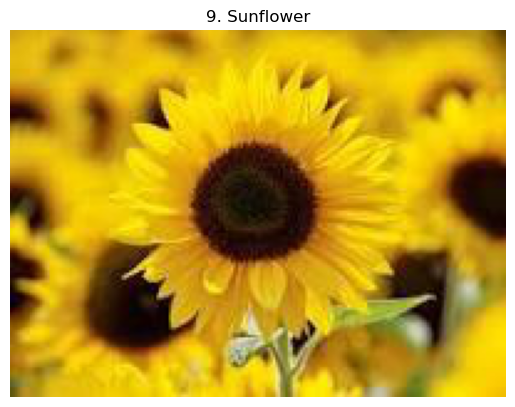

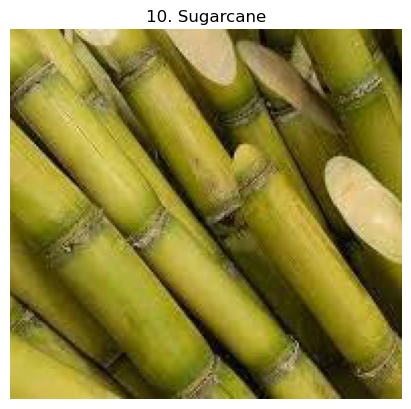

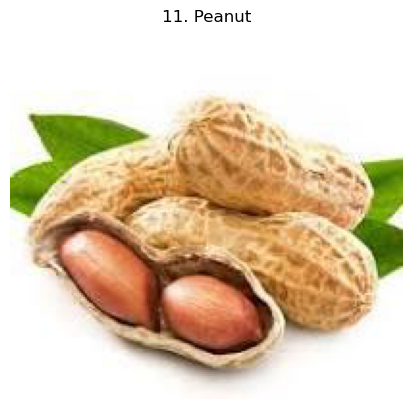

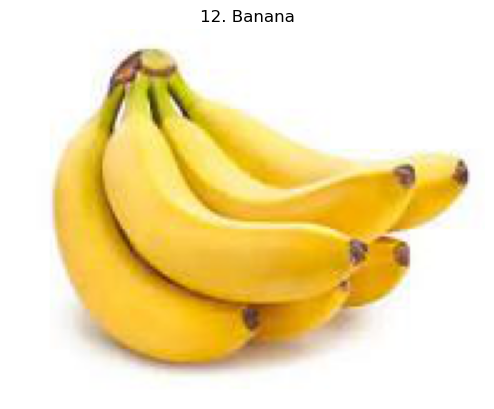

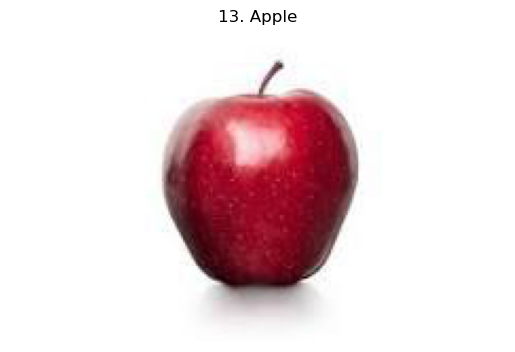

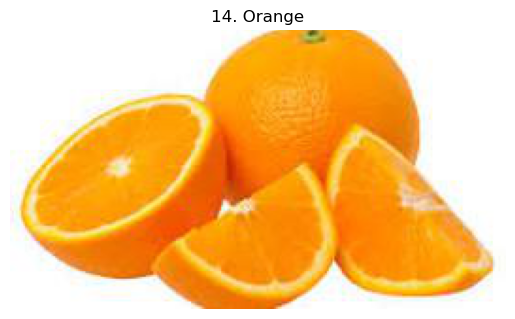

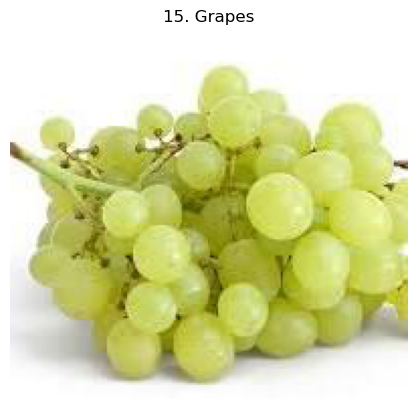

Enter the number corresponding to your choice: 15

You chose: Grapes
Temperature: 22
Humidity: 60
Light: Full
Co2: Medium

Sensor Data Received:
- Crop: Grapes
Parameters:
- Temperature: 24
- Humidity: 62
- Light: Full
- Co2: High
Data sent successfully to ThingSpeak.
Response: {'channel_id': 2454394, 'created_at': '2024-03-18T11:51:10Z', 'entry_id': 66, 'field1': 'Grapes', 'field2': '24', 'field3': '62', 'field4': 'Full', 'field5': 'High', 'field6': None, 'field7': None, 'field8': None, 'latitude': None, 'longitude': None, 'elevation': None, 'status': None}

Actuation Process Started...
Adjusting temperature from 24 to 22
Adjusting humidity from 62 to 60
Adjusting CO2 from High to Medium
Actuation Process Completed.

Final Sensor Data after Actuation:
- Crop: Grapes
Parameters:
- Temperature: 22
- Humidity: 60
- Light: Full
- Co2: Medium


In [5]:


from PIL import Image
import io
import matplotlib.pyplot as plt
import thingspeak

# Load images of crops
tomato_img = Image.open("tomato.jpg")
potato_img = Image.open("potato.jpg")
wheat_img = Image.open("wheat.jpg")
corn_img = Image.open("corn.jpg")
rice_img = Image.open("rice.jpg")
cotton_img = Image.open("cotton.jpg")
barley_img = Image.open("barley.jpg")
soyabean_img = Image.open("soyabean.jpg")
sunflower_img = Image.open("sunflower.jpg")
sugarcane_img = Image.open("sugarcane.jpg")
peanut_img = Image.open("peanut.jpg")
banana_img = Image.open("banana.jpg")
apple_img = Image.open("apple.jpg")
orange_img = Image.open("orange.jpg")
grapes_img = Image.open("grapes.jpg")

# Convert image data to bytes
def image_to_bytes(image):
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format='JPEG')
    img_byte_arr = img_byte_arr.getvalue()
    return img_byte_arr

# Create dataset with images of crops and their parameters
crops = {
    "Tomato": {"image": image_to_bytes(tomato_img), "temperature": 25, "humidity": 60, "light": "Full", "CO2": "Medium"},
    "Potato": {"image": image_to_bytes(potato_img), "temperature": 20, "humidity": 70, "light": "Partial", "CO2": "High"},
    "Wheat": {"image": image_to_bytes(wheat_img), "temperature": 18, "humidity": 50, "light": "Full", "CO2": "Medium"},
    "Corn": {"image": image_to_bytes(corn_img), "temperature": 22, "humidity": 65, "light": "Full", "CO2": "High"},
    "Rice": {"image": image_to_bytes(rice_img), "temperature": 30, "humidity": 80, "light": "Partial", "CO2": "High"},
    "Cotton": {"image": image_to_bytes(cotton_img), "temperature": 25, "humidity": 70, "light": "Full", "CO2": "High"},
    "Barley": {"image": image_to_bytes(barley_img), "temperature": 15, "humidity": 60, "light": "Full", "CO2": "Medium"},
    "Soyabean": {"image": image_to_bytes(soyabean_img), "temperature": 20, "humidity": 60, "light": "Partial", "CO2": "High"},
    "Sunflower": {"image": image_to_bytes(sunflower_img), "temperature": 25, "humidity": 60, "light": "Full", "CO2": "Medium"},
    "Sugarcane": {"image": image_to_bytes(sugarcane_img), "temperature": 30, "humidity": 80, "light": "Full", "CO2": "High"},
    "Peanut": {"image": image_to_bytes(peanut_img), "temperature": 25, "humidity": 70, "light": "Partial", "CO2": "Medium"},
    "Banana": {"image": image_to_bytes(banana_img), "temperature": 27, "humidity": 60, "light": "Partial", "CO2": "High"},
    "Apple": {"image": image_to_bytes(apple_img), "temperature": 20, "humidity": 70, "light": "Partial", "CO2": "Medium"},
    "Orange": {"image": image_to_bytes(orange_img), "temperature": 25, "humidity": 65, "light": "Partial", "CO2": "High"},
    "Grapes": {"image": image_to_bytes(grapes_img), "temperature": 22, "humidity": 60, "light": "Full", "CO2": "Medium"}
}

# Function to display options and get user input
def choose_crop():
    print("Available crops:")
    for i, (crop, data) in enumerate(crops.items()):
        img = Image.open(io.BytesIO(data["image"]))
        plt.imshow(img)
        plt.title(f"{i+1}. {crop}")
        plt.axis('off')
        plt.show()
    while True:
        try:
            choice = int(input("Enter the number corresponding to your choice: "))
            if 1 <= choice <= len(crops):
                return list(crops.keys())[choice - 1]
            else:
                print("Invalid choice. Please enter a number between 1 and 15.")
        except ValueError:
            print("Invalid input. Please enter a number.")

# Get user's chosen crop
chosen_crop = choose_crop()

# Display chosen crop information
print(f"\nYou chose: {chosen_crop}")
for parameter, value in crops[chosen_crop].items():
    if parameter != "image":  # Exclude the image data from the output
        print(f"{parameter.capitalize()}: {value}")

import thingspeak
import json

# Define a function to simulate actuation based on sensor data
def actuate(parameters):
    # Simulate actuation by updating the parameters of the storage facility
    # For demonstration purposes, we'll print the updated parameters
    print("\nActuation Process:")
    for parameter, value in parameters.items():
        print(f"- {parameter.capitalize()}: {value}")

# ThingSpeak channel details
channel_id = 2454394
write_api_key = "WFLSESNCE65EPESZ"
# Initialize ThingSpeak client
client = thingspeak.Channel(channel_id, write_api_key)

# Extract parameters from the response (assuming ThingSpeak response contains parameter data)
import random
def actuate(parameters):
    # Simulate adjusting the sensor data towards optimum levels
    for parameter, value in parameters.items():
        # Optimum levels for demonstration purposes (you can set actual optimum values)
        optimum_levels = {
            "temperature": crops[chosen_crop]["temperature"],
            "humidity": crops[chosen_crop]["humidity"],
            "light": crops[chosen_crop]["light"],
            "CO2": crops[chosen_crop]["CO2"]
        }
        # Adjusting the sensor data towards the optimum levels
        if value != optimum_levels[parameter]:
            print(f"Adjusting {parameter} from {value} to {optimum_levels[parameter]}")
            parameters[parameter] = optimum_levels[parameter]

# Define a function to generate random sensor data around the optimum levels
def generate_random_sensor_data(optimum, deviation=15):
    # Generate random values around the optimum levels with a certain deviation
    random_data = {}
    for parameter, value in optimum.items():
        if parameter in ["temperature", "humidity"]:
            random_data[parameter] = max(0, min(100, random.randint(value - deviation, value + deviation)))
        elif parameter == "light":
            # Introduce variation for light sensor
            random_data[parameter] = random.choice(["Full", "Partial"])
        elif parameter == "CO2":
            # Introduce variation for CO2 sensor
            random_data[parameter] = random.choice(["Low", "Medium", "High"])
    return random_data


# Actuate based on sensor data
print("\nSensor Data Received:")
print(f"- Crop: {chosen_crop}")

# Generate random sensor data around the optimum levels
parameters_from_sensor = generate_random_sensor_data({
    "temperature": crops[chosen_crop]["temperature"],
    "humidity": crops[chosen_crop]["humidity"],
    "light": crops[chosen_crop]["light"],
    "CO2": crops[chosen_crop]["CO2"]
})

print("Parameters:")
for parameter, value in parameters_from_sensor.items():
    print(f"- {parameter.capitalize()}: {value}")

# Prepare data to send
data_to_send = {
    "field1": chosen_crop,
    "field2": parameters_from_sensor["temperature"],
    "field3": parameters_from_sensor["humidity"],
    "field4": parameters_from_sensor["light"],
    "field5": parameters_from_sensor["CO2"]
}

# Send data to ThingSpeak
response = client.update(data_to_send)

# Check if the response is a JSON string
try:
    response_json = json.loads(response)
    print("Data sent successfully to ThingSpeak.")
    print("Response:", response_json)
except json.JSONDecodeError:
    print("Failed to send data to ThingSpeak. Response:", response_json)

# Simulate actuation based on sensor data
print("\nActuation Process Started...")
actuate(parameters_from_sensor)
print("Actuation Process Completed.")

# Display adjusted parameters after actuation
print("\nFinal Sensor Data after Actuation:")
print(f"- Crop: {chosen_crop}")
print("Parameters:")
for parameter, value in parameters_from_sensor.items():
    print(f"- {parameter.capitalize()}: {value}")


In [ ]:
import time
import random
from IPython.display import Audio, display, HTML

# Specify the file path to your beep.wav file
audio_file_path = "beep.wav"

# Function to play audio
def play_audio():
    display(Audio(filename=audio_file_path, autoplay=True))

# Function to simulate sensor data collection after a fixed time interval (60 seconds)
def collect_sensor_data():
    print("\nCollecting sensor data after a fixed time interval...")
    time.sleep(10)  # Wait for 10 seconds

    # Generate random sensor data for testing purpose
    sensor_data = generate_random_sensor_data({
        "temperature": crops[chosen_crop]["temperature"],
        "humidity": crops[chosen_crop]["humidity"],
        "light": crops[chosen_crop]["light"],
        "CO2": crops[chosen_crop]["CO2"]  # Changed from "moisture" to "CO2"
    })

    return sensor_data

# Function to generate random sensor data around the optimum levels
def generate_random_sensor_data(optimum, deviation=15):
    # Generate random values around the optimum levels with a certain deviation
    random_data = {}
    for parameter, value in optimum.items():
        if parameter in ["temperature", "humidity"]:
            random_data[parameter] = max(0, min(100, random.uniform(value - deviation, value + deviation)))  # Using random.uniform to generate float values
        elif parameter == "light":
            # Introduce variation for light sensor
            random_data[parameter] = random.choice(["Full", "Partial"])
        elif parameter == "CO2":  # Changed from "moisture" to "CO2"
            # Introduce variation for CO2 sensor
            random_data[parameter] = random.choice(["Low", "Medium", "High"])
    return random_data

# Function to compare sensor data with the original values and raise warnings if necessary
def compare_sensor_data(original_data, new_data):
    warnings = []

    for parameter, value in new_data.items():
        original_value = original_data.get(parameter)

        if original_value is not None:
            # Ensure values are numeric for temperature and humidity
            if parameter in ["temperature", "humidity"]:
                try:
                    value = float(value)
                    original_value = float(original_value)
                except ValueError:
                    # If value cannot be converted to float, skip comparison
                    warnings.append(f"<b><font color='red' size='4'>Warning: Non-numeric value detected for {parameter}.</font></b>")
                    continue

                # Check if the new value is beyond +-10% of the original value
                if value < 0.9 * original_value:
                    warnings.append(f"<b><font color='red' size='28'>{parameter.capitalize()} is low.</font></b>")
                elif value > 1.1 * original_value:
                    warnings.append(f"<b><font color='red' size='28'>{parameter.capitalize()} is high.</font></b>")

            # For non-numeric parameters (light and CO2), compare values directly
            elif parameter in ["light", "CO2"]:  # Changed from "moisture" to "CO2"
                if value != original_value:
                    warnings.append(f"<b><font color='red' size='28'>{parameter.capitalize()} parameters not good.</font></b>")

    return warnings


# Simulate the process of gathering sensor data and comparing it with the original values
while True:
    # Collect sensor data
    new_sensor_data = collect_sensor_data()

    # Compare sensor data with original values
    warnings = compare_sensor_data(parameters_from_sensor, new_sensor_data)

    # Display warnings if any
    if warnings:
        print("\nWarnings Detected:")
        for warning in warnings:
            display(HTML(warning))
        
        # Play audio
        play_audio()
    else:
        print("\nNo warnings detected.")




Warnings Detected:




Warnings Detected:




Warnings Detected:




Warnings Detected:




Warnings Detected:




Warnings Detected:




Warnings Detected:




Warnings Detected:




Warnings Detected:




Warnings Detected:




Warnings Detected:




Warnings Detected:




Warnings Detected:




Warnings Detected:
